In [6]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [9]:
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
#https://textblob.readthedocs.io/en/dev/

In [7]:
#read yelp.csv into a DataFrame
url = 'yelp.csv'
yelp = pd.read_csv(url)

print yelp

#create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

                 business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg   1/26/2011  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow   7/27/2011  IjZ33sJrzXqU-0X6U8NwyA      5   
2     6oRAC4uyJCsJl1X0WZpVSA   6/14/2012  IESLBzqUCLdSzSqm0eCSxQ      4   
3     _1QQZuf4zZOyFCvXc0o6Vg   5/27/2010  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw    1/5/2012  1uJFq2r5QfJG_6ExMRCaGw      5   
5                     #NAME?  12/13/2007  m2CKSsepBCoRYWxiRUsxAg      4   
6     zp713qNhx8d9KCJJnrw1xA   2/12/2010  riFQ3vxNpP4rWLk_CSri2A      5   
7     hW0Ne_HTHEAgGF1rAdmR-g   7/12/2012  JL7GXJ9u4YMx7Rzs05NfiQ      4   
8     wNUea3IXZWD63bbOQaOH-g   8/17/2012  XtnfnYmnJYi71yIuGsXIUA      4   
9     nMHhuYan8e3cONo3PornJA   8/11/2010  jJAIXA46pU1swYyRCdfXtQ      5   
10    AsSCv0q_BWqIe3mX2JqsOQ   6/16/2010  E11jzpKz9Kw5K7fuARWfRw      5   
11    e9nN4XxjdHj4qtKCOPq_vg  10/21/2011  3rPt0LxF7rgmEUrznoH22w      5   
12    h53YuCiIDfEFSJCQpk8

In [8]:
#define X and y
#x - separate all the text
X = yelp_best_worst.text
print X

#y - separate all the stars rating
y = yelp_best_worst.stars
print y

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
6       Drop what you're doing and drive here. After I...
9       Nobuo shows his unique talents with everything...
10      The oldish man who owns the store is as sweet ...
11      Wonderful Vietnamese sandwich shoppe. Their ba...
12      They have a limited time thing going on right ...
17      okay this is the best place EVER! i grew up sh...
21      This place shouldn't even be reviewed - becaus...
22      first time my friend and I went there... it wa...
23      U can go there n check the car out. If u wanna...
24      I love this place! I have been coming here for...
26      I love love LOVE this place. My boss (who is i...
30      Disclaimer: Like many of you, I am a sucker fo...
31      Disgusting!  Had a Groupon so my daughter and ...
32      Never 

In [9]:
#split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=1)

#test_size=0.33
print X_train
print X_test
print y_train.count
print y_test.count

4309    Im a sucker for great libations and the stores...
108     It's just like pizza bianco without the wait. ...
7533    Is there a way I can give LUSH an extra star??...
9108    What can I say about this place? I love it. It...
8582    My husband and I heard great reviews about thi...
3504    They finally just opened a Rita's location in ...
5240    Green....how I love thee.  Green may be vegan/...
4660    Just a quick review to reiterate how truly gre...
1199    Excellent Soutwest breakfast bowl.  Great serv...
8216    My daughter and I really enjoy eating here. We...
6489    I'm a complete dive bar junkie. Whether I'm in...
9231    Recently ordered Spinato's again and just had ...
5750    Kids love Disney, and so do I.  One of my favo...
4968                                           Excellent.
5264    i tried the thai river noodles. they will not ...
2745    I'm sure most people don't go to a fancy steak...
2950    This is the best restaurant in Phoenix. My wif...
3390    Okay, 

In [ ]:
#part 2 Tokenization
#What: separate text into units such as sentances or words
#why: gives structure to previously unstructured text
#notes: relatively easy with English language text, not easy with some languages

In [10]:
#use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()
#print vect

#print X_train
X_train_dtm = vect.fit_transform(X_train)
#X_train_dtm = vec.fit_transform(X_train).toarray()

print X_train_dtm

X_test_dtm = vect.transform(X_test)

#print X_test_dtm

  (0, 13008)	1
  (0, 6068)	1
  (0, 15867)	1
  (0, 15645)	1
  (0, 9739)	1
  (0, 14802)	1
  (0, 625)	1
  (0, 14195)	1
  (0, 12524)	1
  (0, 15675)	1
  (0, 8411)	1
  (0, 7191)	2
  (0, 5358)	1
  (0, 15465)	1
  (0, 2821)	1
  (0, 7499)	1
  (0, 1899)	1
  (0, 9340)	2
  (0, 8524)	1
  (0, 8792)	1
  (0, 15934)	1
  (0, 15734)	1
  (0, 2422)	1
  (0, 2292)	1
  (0, 14253)	1
  :	:
  (2736, 5022)	1
  (2736, 6775)	1
  (2736, 815)	1
  (2736, 14499)	1
  (2736, 2660)	1
  (2736, 11402)	1
  (2736, 6481)	2
  (2736, 15143)	1
  (2736, 4364)	1
  (2736, 1444)	1
  (2736, 15412)	2
  (2736, 2177)	1
  (2736, 9802)	2
  (2736, 6625)	1
  (2736, 8808)	1
  (2736, 5666)	2
  (2736, 15017)	1
  (2736, 14268)	1
  (2736, 6116)	1
  (2736, 14448)	1
  (2736, 9283)	1
  (2736, 14316)	2
  (2736, 7741)	2
  (2736, 14258)	2
  (2736, 745)	2


In [11]:
tf = pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names())
tf.head()

,00,000,00am,00pm,01,03,03342,04,05,07,...,zucchini,zuchinni,zumba,zupa,zuzu,zwiebel,zzed,éclairs,école,ém
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train.head()

4309    Im a sucker for great libations and the stores...
108     It's just like pizza bianco without the wait. ...
7533    Is there a way I can give LUSH an extra star??...
9108    What can I say about this place? I love it. It...
8582    My husband and I heard great reviews about thi...
Name: text, dtype: object

In [13]:
#rows are documents, columns are terms (tokens or features)
#print X_train_dtm
print X_train_dtm.shape

#print X_train.dtm.sum
#print X_train.dtm.shape

(2737, 15960)


In [14]:
#last 50 features

#print vect.get_feature_names()

print vect.get_feature_names()[-50:]

[u'yuuuuuuum', u'yuyuyummy', u'yuzu', u'yyyyy', u'z11', u'za', u'zabba', u'zach', u'zam', u'zanella', u'zatsiki', u'zen', u'zero', u'zest', u'zexperience', u'zha', u'zhou', u'zia', u'zihuatenejo', u'zilch', u'zin', u'zinburger', u'zinburgergeist', u'zinc', u'zinfandel', u'zing', u'zip', u'zipcar', u'zipper', u'zippers', u'zipps', u'ziti', u'zoe', u'zombi', u'zombies', u'zone', u'zones', u'zoning', u'zoo', u'zucca', u'zucchini', u'zuchinni', u'zumba', u'zupa', u'zuzu', u'zwiebel', u'zzed', u'\xe9clairs', u'\xe9cole', u'\xe9m']


In [15]:
#show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [16]:
#lowercase

#don't convert to lowercase
vect = CountVectorizer(lowercase=False)

#print vect

X_train_dtm = vect.fit_transform(X_train)

#print X_train_dtm

X_train_dtm.shape
#print X_train_dtm.shape

(2737, 19713)

In [17]:
#N-grams: move one word forward, 
  #used in text mining, analytics and more

#include 1-grams and 2-grams

vect=CountVectorizer(ngram_range=(1,2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(2737, 156567)

In [18]:
#last 50 features
print vect.get_feature_names()[-50:]

[u'zombies the', u'zone', u'zone of', u'zone out', u'zone when', u'zones', u'zones dolls', u'zoning', u'zoning issues', u'zoo', u'zoo and', u'zoo is', u'zoo not', u'zoo the', u'zoo ve', u'zucca', u'zucca appetizer', u'zucchini', u'zucchini and', u'zucchini bread', u'zucchini broccoli', u'zucchini carrots', u'zucchini fries', u'zucchini pieces', u'zucchini strips', u'zucchini very', u'zucchini with', u'zuchinni', u'zuchinni again', u'zuchinni the', u'zumba', u'zumba class', u'zumba or', u'zumba yogalates', u'zupa', u'zupa flavors', u'zuzu', u'zuzu in', u'zuzu is', u'zuzu the', u'zwiebel', u'zwiebel kr\xe4uter', u'zzed', u'zzed in', u'\xe9clairs', u'\xe9clairs napoleons', u'\xe9cole', u'\xe9cole len\xf4tre', u'\xe9m', u'\xe9m all']


In [19]:
#use default options for CountVectorizer
vect = CountVectorizer()

#create document_term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

#print X_train_dtm
#print X_test_dtm
#use Naive Bayes to predict the star rating
nb = MultinomialNB()

#print X_train_dtm
#print y_train
nb.fit(X_train_dtm, y_train)

y_pred_class = nb.predict(X_test_dtm)
#print y_pred_class
#calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.911045218681


In [20]:
#define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print "Features: ", X_train_dtm.shape[1]
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print "Accuracy: ", metrics.accuracy_score(y_test, y_pred_class)

In [21]:
#include 1-grams and 2-grams

vect = CountVectorizer(ngram_range=(1,2))
tokenize_test(vect)

Features:  156567
Accuracy:  0.84581171238


In [ ]:
#part 3: stopword removal
#what: remove common words that will likely appear in any text
#why: they don't tell you much about your text

In [22]:
#remove English stop words
#print vect

vect = CountVectorizer(stop_words='english')
#print vect

tokenize_test(vect)

Features:  15663
Accuracy:  0.908821349148


In [23]:
#set of stop words
print vect.get_stop_words()

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'fifty', 'four', 'not', 'own', 'through', 'yourselves', 'go', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'nei

In [24]:
#other CountVectorizer Options

#remove English stop words and only keep 100 features

vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Features:  100
Accuracy:  0.867309117865


In [ ]:
#doesn't mean that lower the features, better accuracy

In [25]:
#all 100 features
print vect.get_feature_names()

[u'amazing', u'area', u'atmosphere', u'awesome', u'bad', u'bar', u'best', u'better', u'big', u'bread', u'came', u'cheese', u'chicken', u'coffee', u'come', u'day', u'definitely', u'delicious', u'did', u'didn', u'dinner', u'don', u'eat', u'excellent', u'experience', u'favorite', u'feel', u'food', u'free', u'fresh', u'friendly', u'going', u'good', u'got', u'great', u'happy', u'home', u'hot', u'hour', u'just', u'know', u'like', u'little', u'll', u'location', u'long', u'looking', u'lot', u'love', u'lunch', u'make', u'meal', u'menu', u'minutes', u'need', u'new', u'nice', u'night', u'order', u'ordered', u'people', u'perfect', u'phoenix', u'pizza', u'place', u'pretty', u'prices', u'really', u'recommend', u'restaurant', u'right', u'said', u'salad', u'sandwich', u'sauce', u'say', u'service', u'staff', u'store', u'sure', u'sweet', u'table', u'thing', u'things', u'think', u'time', u'times', u'took', u'town', u'tried', u'try', u've', u'wait', u'want', u'way', u'went', u'wine', u'work', u'worth', u'

In [26]:
#include 1-grams and 2-grams, and limit the number of features

vect = CountVectorizer(ngram_range=(1,2), max_features=100000)
tokenize_test(vect)

Features:  100000
Accuracy:  0.871756856931


In [27]:
#include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1,2),min_df=2)
tokenize_test(vect)

Features:  39991
Accuracy:  0.9280948851


In [49]:
#Part 5: introduction to TextBlob

In [28]:
#print the first review
print yelp_best_worst.text[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [29]:
#save it as a TextBlob object

review=TextBlob(yelp_best_worst.text[0])

In [30]:
#list the words
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [31]:
#list the sentences
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [32]:
#some string methods are available

review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

In [55]:
#Part 6: Stemming and Lemmatization

In [33]:
#initialize stemmer
stemmer = SnowballStemmer('english')

#stem each word
print [stemmer.stem(word) for word in review.words]

[u'my', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'was', u'excel', u'the', u'weather', u'was', u'perfect', u'which', u'made', u'sit', u'outsid', u'overlook', u'their', u'ground', u'an', u'absolut', u'pleasur', u'our', u'waitress', u'was', u'excel', u'and', u'our', u'food', u'arriv', u'quick', u'on', u'the', u'semi-busi', u'saturday', u'morn', u'it', u'look', u'like', u'the', u'place', u'fill', u'up', u'pretti', u'quick', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'bloodi', u'mari', u'it', u'was', u'phenomen', u'and', u'simpli', u'the', u'best', u'i', u've', u'ever', u'had', u'i', u"'m", u'pretti', u'sure', u'they', u'onli', u'use', u'ingredi', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'it', u'was', u'amaz', u'while', u'everyth', u'on', u'the', u'menu', u'look', u'excel', u'i', u'ha

In [34]:
#lemmatization
#assume every word is a noun
print [word.lemmatize() for word in review.words]

['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', u'wa', 'excellent', 'The', 'weather', u'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', u'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', u'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', u'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', u'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', u'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', u'wa', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', u'look', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', u'egg', 'vegetabl

In [35]:
#assume every word is a verb
print [word.lemmatize(pos='v') for word in review.words]

['My', 'wife', u'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', u'be', 'excellent', 'The', 'weather', u'be', 'perfect', 'which', u'make', u'sit', 'outside', u'overlook', 'their', u'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', u'be', 'excellent', 'and', 'our', 'food', u'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', u'look', 'like', 'the', 'place', u'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', u'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', u'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', u'be', u'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', u'look', 'excellent', 'I', u'have', 'the', 'white', 'truffle', u'scramble', u'egg', 'vegetable

In [36]:
#define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = unicode(text, 'utf-8').lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [37]:
#use split_into_lemmas as the feature extraction function(warning: slow!)
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  15530
Accuracy:  0.915492957746


In [ ]:
#part 8: using TF-IDF to summarize a yelp review

In [38]:
#create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(yelp.text)
features = vect.get_feature_names()
dtm.shape

(10000, 28879)

In [39]:
def summarize():
     #choose a random review that is at least 300 characters
     review_length = 0
     while review_length < 300:
         review_id = np.random.randint(0, len(yelp))
         review_text = unicode(yelp.text[review_id], 'utf-8')
         review_length = len(review_text)

     #create a dictionary of words and their TF-IDF scores
     word_scores = {}
     for word in TextBlob(review_text).words:
         word = word.lower()
         if word in features:
             word_scores[word] = dtm[review_id, features.index(word)]

     # print words with the top 5 TF-IDF scores
     print 'TOP SCORING WORDS:'
     top_scores = sorted(word_scores.items(), key=lambda x: x[1], 
reverse=True)[:5]
     for word, score in top_scores:
         print word

     # print 5 random words
     print '\n' + 'RANDOM WORDS:'
     random_words = np.random.choice(word_scores.keys(), size=5, 
replace=False)
     for word in random_words:
         print word

     # print the review
     print '\n' + review_text

In [40]:
summarize()

TOP SCORING WORDS:
assume
pita
shack
bumper
falafel

RANDOM WORDS:
shot
baseline
closed
house
previously

Sometimes you just want to give an A for effort...

Or maybe more than three lame stars.  As the two other previous reviewers have pointed out succinctly, the man who I assume to be the owner was extremely nice.  I made the 1.5 hour drive from Tucson to watch Avatar at Arizona Mills, and my friends and I decided to grab a bite before heading back.  We randomly drove down Baseline and pretty much stumbled upon this place.  Traffic going westbound towards the 10 was insane.  I mean it was bumper to bumper past Rural.  Anyway, I ask the guy who I assume is the owner why the traffic was so bad.  At first he didn't know, but then realized that the 60 was closed.  He politely recommended that we head south then cut across to get back to the 10.  

I ordered the Jerusalem Falafel sandwich. It was pretty good.  Though, in all honesty, falafel is not one those kind of dishes that one can gu

In [41]:
#sentimental analysis: text classification model
#http://text-processing.com/demo/sentiment

print review

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [42]:
#polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.40246913580246907

In [43]:
#understand the apply method

yelp['length'] = yelp.text.apply(len)
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895


In [44]:
#define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

In [45]:
#creating a new DataFrame column for sentiment (warning: slow!)
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

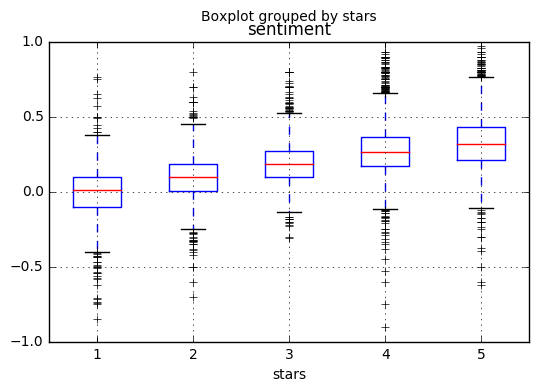

In [46]:
#box plot of sentiment grouped by stars
yelp.boxplot(column='sentiment', by='stars')